In [1]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-29 14:08:03.909249: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 14:08:04.261313: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 14:08:04.261410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 14:08:04.270

In [2]:
# Load modlities of GRADE 3
G3_mod_1 = glob.glob(r"GRADE-3/t1/*.png") 
G3_mod_2 = glob.glob(r"GRADE-3/t2/*.png")
# G3_mod_3 = glob.glob(r"GRADE-3/t2/*.png")
# G3_mod_4 = glob.glob(r"GRADE-3/t1ce/*.png")

# Load modlities of GRADE 4
G4_mod_1 = glob.glob(r"GRADE-4/t1/*.png")
G4_mod_2 = glob.glob(r"GRADE-4/t2/*.png")
# G4_mod_3 = glob.glob(r"GRADE-4/t2/*.png")
# G4_mod_4 = glob.glob(r"GRADE-4/t1ce/*.png")

#G3 data place holder
G3_mod_1_data = []
G3_mod_2_data = []
# G3_mod_3_data = []
# G3_mod_4_data = []

#G4 data place holder
G4_mod_1_data = []
G4_mod_2_data = []
# G4_mod_3_data = []
# G4_mod_4_data = []


# Read GRADE-3 images and store them in placeholder
for img in G3_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G3_mod_1_data.append(data)

for img in G3_mod_2:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G3_mod_2_data.append(data)

# for img in G3_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_3_data.append(data)
    
# for img in G3_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G3_mod_4_data.append(data)

# Read GRADE-4 images and store them in placeholder
for img in G4_mod_1:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G4_mod_1_data.append(data)

for img in G4_mod_2:
    data = cv2.imread(img, 1)
    data = cv2.resize(data, (224, 224))
    G4_mod_2_data.append(data)
    
# for img in G4_mod_3:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_3_data.append(data)
    
# for img in G4_mod_4:
#     data = cv2.imread(img, 1)
#     data = cv2.resize(data, (224, 224))
#     G4_mod_4_data.append(data)

In [3]:
''' 
Create two array 'zeros' and 'ones' containing all zeros and ones respectively. 
Here the  zeros array serves the purpose of labels for GRADE-3 and the ones array serves the purpose of labels for GRADE-4
'''

zeros= np.zeros(len(G3_mod_1))

ones = np.ones(len(G4_mod_1))


In [4]:
# Combine same modalities of different GRADES for training. 

img_mod_1_data = G3_mod_1_data + G4_mod_1_data
img_mod_2_data = G3_mod_2_data + G4_mod_2_data
# img_mod_3_data = G3_mod_3_data + G4_mod_3_data
# img_mod_4_data = G3_mod_4_data + G4_mod_4_data

img_mod_1_data = np.array(img_mod_1_data)
img_mod_2_data = np.array(img_mod_2_data)
# img_mod_3_data = np.array(img_mod_3_data)
# img_mod_4_data = np.array(img_mod_4_data)

img_mod_1 = img_mod_1_data/255
img_mod_2 = img_mod_2_data/255
# img_mod_3 = img_mod_3_data/255
# img_mod_4 = img_mod_4_data/255

# print(img_mod_1_data.shape, img_mod_2_data.shape, img_mod_3_data.shape, img_mod_4_data.shape)
print(img_mod_1_data.shape, img_mod_2_data.shape)

(2856, 224, 224, 3) (2856, 224, 224, 3)


In [5]:
# Combining labels for both GRADES into one array/list

labels = np.append(zeros, ones)

In [6]:
# CNN model definition
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# For Mod_1
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation="relu"))

# For Mod_2
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(128, (3, 3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation="relu"))

fused_features = tf.keras.layers.Concatenate()([model_1.output, model_2.output])

output = Dense(1, activation='sigmoid')(fused_features)

model = Model(inputs = [model_1.input, model_2.input], outputs = output)


2023-11-29 14:08:26.789518: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:08:27.044947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:08:27.045080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:08:27.055838: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 14:08:27.055966: I external/local_xla/xla/stream_executor

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()], run_eagerly=True)

In [8]:
#comb = np.concatenate([img_mod_1, img_mod_2, img_mod_3, img_mod_4], axis = -1)
# comb = img_mod_1

# print("Mod 1 and Mod 2 Shape: ", comb.shape)
# print("Labels Shape: ", labels.shape)

In [9]:
from sklearn.model_selection import train_test_split

img_1_train, img_1_test, labels_1_train, labels_1_test = train_test_split(img_mod_1, labels, stratify=labels, test_size=0.2, random_state = 42)
img_1_train, img_1_val, labels_1_train, labels_1_val = train_test_split(img_1_train, labels_1_train, stratify=labels_1_train, test_size=0.25, random_state = 42)

print(img_1_train.shape, labels_1_train.shape)
print(img_1_val.shape, labels_1_val.shape)
print(img_1_test.shape, labels_1_test.shape)

(1713, 224, 224, 3) (1713,)
(571, 224, 224, 3) (571,)
(572, 224, 224, 3) (572,)


In [10]:
img_2_train, img_2_test, labels_2_train, labels_2_test = train_test_split(img_mod_2, labels, stratify=labels, test_size=0.2, random_state = 42)
img_2_train, img_2_val, labels_2_train, labels_2_val = train_test_split(img_2_train, labels_2_train, stratify=labels_2_train, test_size=0.25, random_state = 42)

print(img_2_train.shape, labels_2_train.shape)
print(img_2_val.shape, labels_2_val.shape)
print(img_2_test.shape, labels_2_test.shape)

(1713, 224, 224, 3) (1713,)
(571, 224, 224, 3) (571,)
(572, 224, 224, 3) (572,)


In [11]:
# Train the model and store the results
history = model.fit([img_1_train, img_2_train], [labels_1_train, labels_2_train], validation_data=([img_1_val, img_2_val], [labels_1_val, labels_2_val]),  epochs=20, batch_size=32)

Epoch 1/20


2023-11-29 14:08:44.462853: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2023-11-29 14:08:52.457544: I external/local_xla/xla/service/service.cc:168] XLA service 0xce79fec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 14:08:52.457605: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2023-11-29 14:08:52.464159: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701247132.606079   17782 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 [==============================] - 29s 231ms/step - loss: 0.6811 - binary_accuracy: 0.5966 - precision: 0.5918 - recall: 0.6513 - auc: 0.6459 - val_loss: 0.5313 - val_binary_accuracy: 0.7303 - val_precision: 0.8564 - val_recall: 0.5590 - val_auc: 0.8221
Epoch 2/20
54/54 [==============================] - 8s 148ms/step - loss: 0.4458 - binary_accuracy: 0.7875 - precision: 0.8122 - recall: 0.7540 - auc: 0.8700 - val_loss: 0.3847 - val_binary_accuracy: 0.8004 - val_precision: 0.7486 - val_recall: 0.9097 - val_auc: 0.9253
Epoch 3/20
54/54 [==============================] - 7s 130ms/step - loss: 0.2266 - binary_accuracy: 0.9043 - precision: 0.9072 - recall: 0.9030 - auc: 0.9705 - val_loss: 0.1791 - val_binary_accuracy: 0.9352 - val_precision: 0.9343 - val_recall: 0.9375 - val_auc: 0.9816
Epoch 4/20
54/54 [==============================] - 7s 137ms/step - loss: 0.0823 - binary_accuracy: 0.9726 - precision: 0.9756 - recall: 0.9700 - auc: 0.9959 - val_loss: 0.1100 - val_binary_accuracy: 

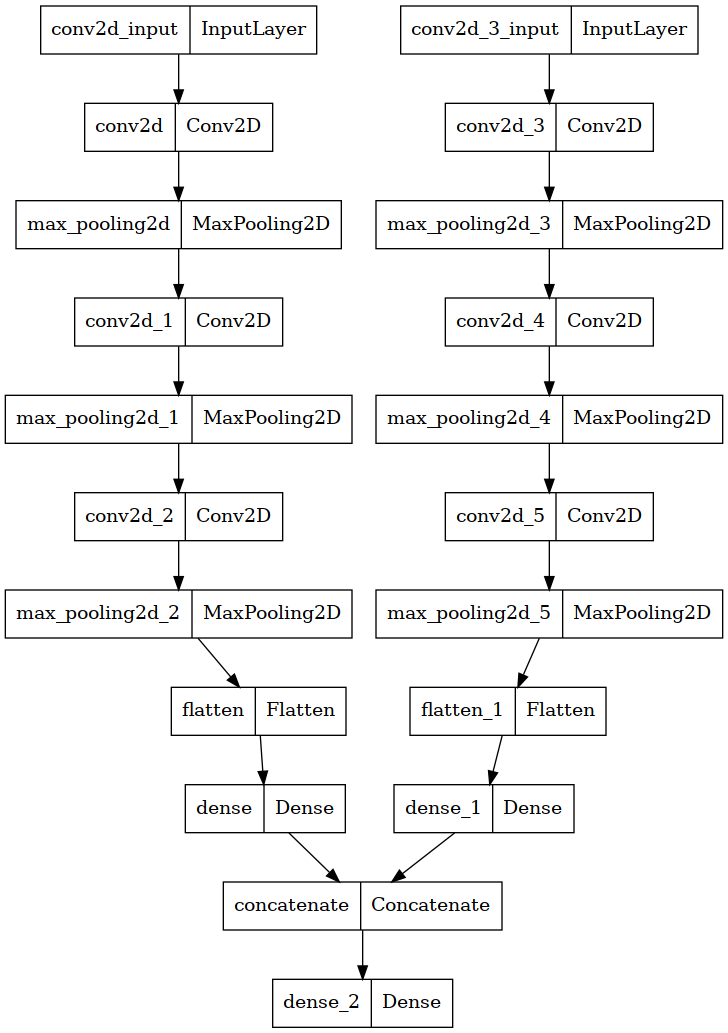

In [12]:
from keras.utils import plot_model
plot_model(model)

In [13]:
# Evaluate model on unseen (test) data

y_pred = model.predict([img_1_test, img_2_test])
y_pred_binary = (y_pred > 0.5).astype(int) 

# Calculate accuracy
accuracy = accuracy_score(labels_1_test, y_pred_binary)
precision = precision_score(labels_1_test, y_pred_binary)
recall = recall_score(labels_1_test, y_pred_binary)
f1 = f1_score(labels_1_test, y_pred_binary)

# Confusion matrix
conf_matrix = confusion_matrix(labels_1_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

18/18 [==============================] - 1s 70ms/step
Accuracy: 0.9912587412587412
Precision: 0.9896551724137931
Recall: 0.9930795847750865
F1 Score: 0.9913644214162349
Confusion Matrix:
[[280   3]
 [  2 287]]


In [14]:
# Calculate accuracy
accuracy = accuracy_score(labels_2_test, y_pred_binary)
precision = precision_score(labels_2_test, y_pred_binary)
recall = recall_score(labels_2_test, y_pred_binary)
f1 = f1_score(labels_2_test, y_pred_binary)

# Confusion matrix
conf_matrix = confusion_matrix(labels_2_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9912587412587412
Precision: 0.9896551724137931
Recall: 0.9930795847750865
F1 Score: 0.9913644214162349
Confusion Matrix:
[[280   3]
 [  2 287]]


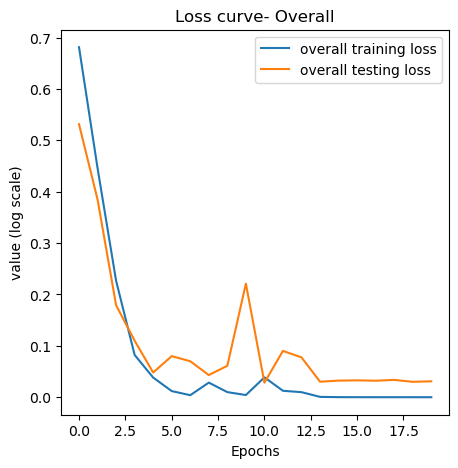

In [15]:
# Loss Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(history.history["loss"], label="overall training loss")
plt.plot(history.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

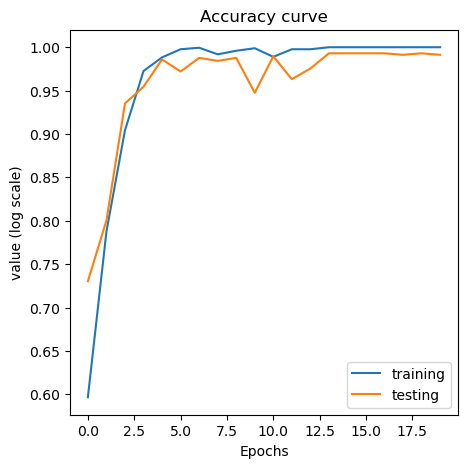

In [17]:
# Accuracy Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve")
plt.plot(history.history["binary_accuracy"], label="training")
plt.plot(history.history["val_binary_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

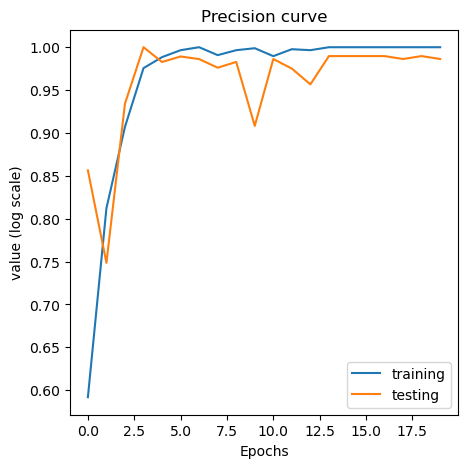

In [18]:
# Precision Curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve")
plt.plot(history.history["precision"], label="training")
plt.plot(history.history["val_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

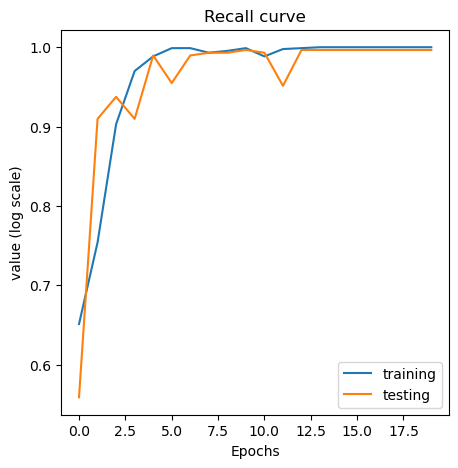

In [19]:
#Recall curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve")
plt.plot(history.history["recall"], label="training")
plt.plot(history.history["val_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

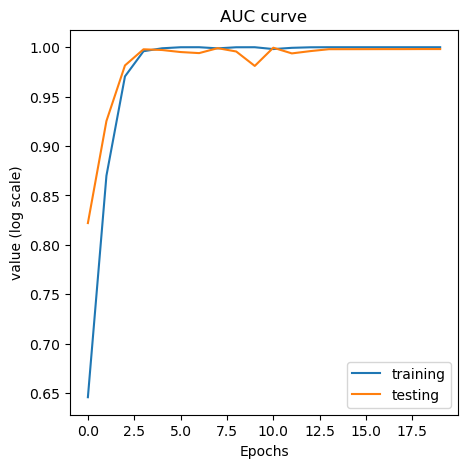

In [20]:
# AUC curve

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()